##**MINI PROJECT - BRAIN STROKE PREDICTION USING MACHINE LEARNING**

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read Dataset

In [64]:
df = pd.read_csv("/content/drive/MyDrive/Mini_Project_BrainStroke/Dataset /healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [65]:
df.shape

(5110, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [67]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##**Data  Preprocessing**

Checking for null values

In [68]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [69]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [70]:
from sklearn.impute import KNNImputer

In [71]:
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [72]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [73]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


##**Exploratory Data Analysis**

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Stroke value statistics

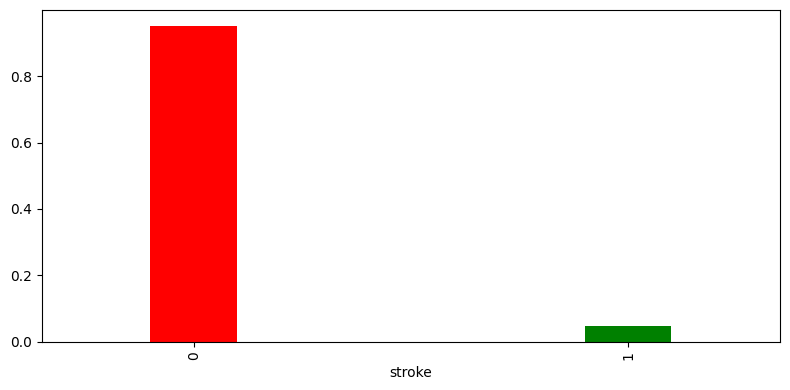

In [75]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

In [76]:
df['stroke'].value_counts()


,count
stroke,
0,4861
1,249


## Handling Class Imbalance

Text(0, 0.5, 'Count')

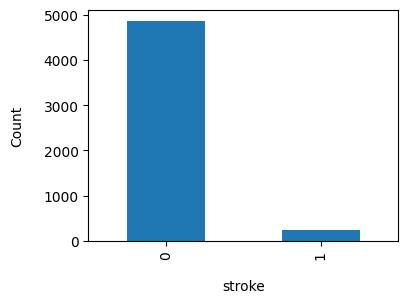

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

df['stroke'].value_counts().plot(kind='bar',figsize=(4,3))
plt.xlabel("stroke",labelpad=14)
plt.ylabel("Count",labelpad=14)

In [78]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('stroke', axis=1)
y = df['stroke']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
df = pd.concat([X_res, y_res], axis=1)

Text(0, 0.5, 'Count')

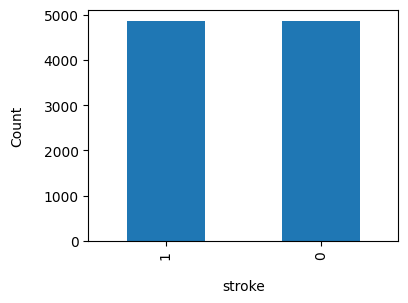

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

df['stroke'].value_counts().plot(kind='bar',figsize=(4,3))
plt.xlabel("stroke",labelpad=14)
plt.ylabel("Count",labelpad=14)

In [80]:
df.shape

(9722, 12)

In [81]:
df['stroke'].value_counts()

,count
stroke,
1,4861
0,4861


Different attributes


In [82]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


## Finding Trends and Patterns

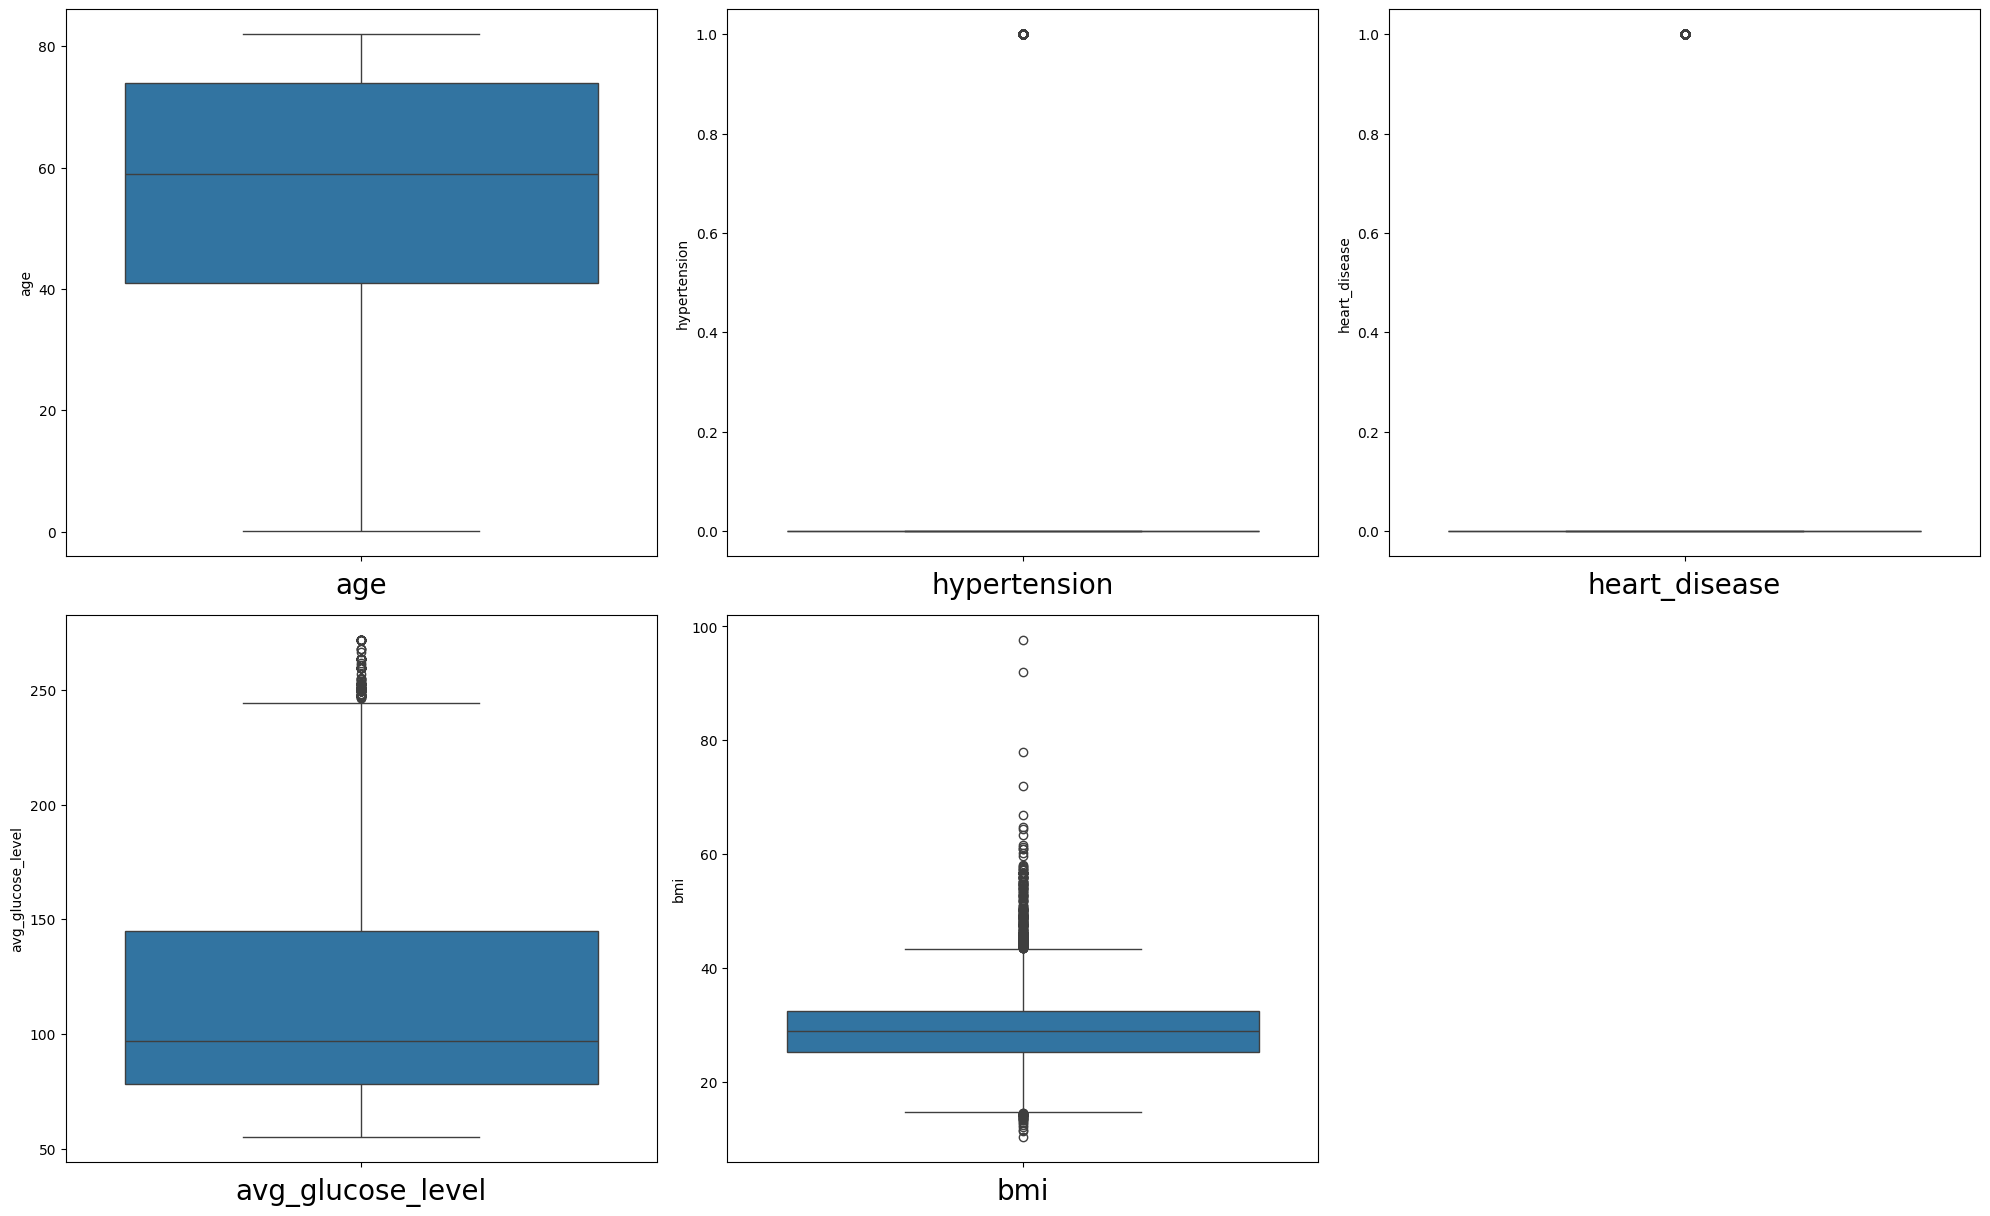

In [83]:
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()


Dataset value distribution

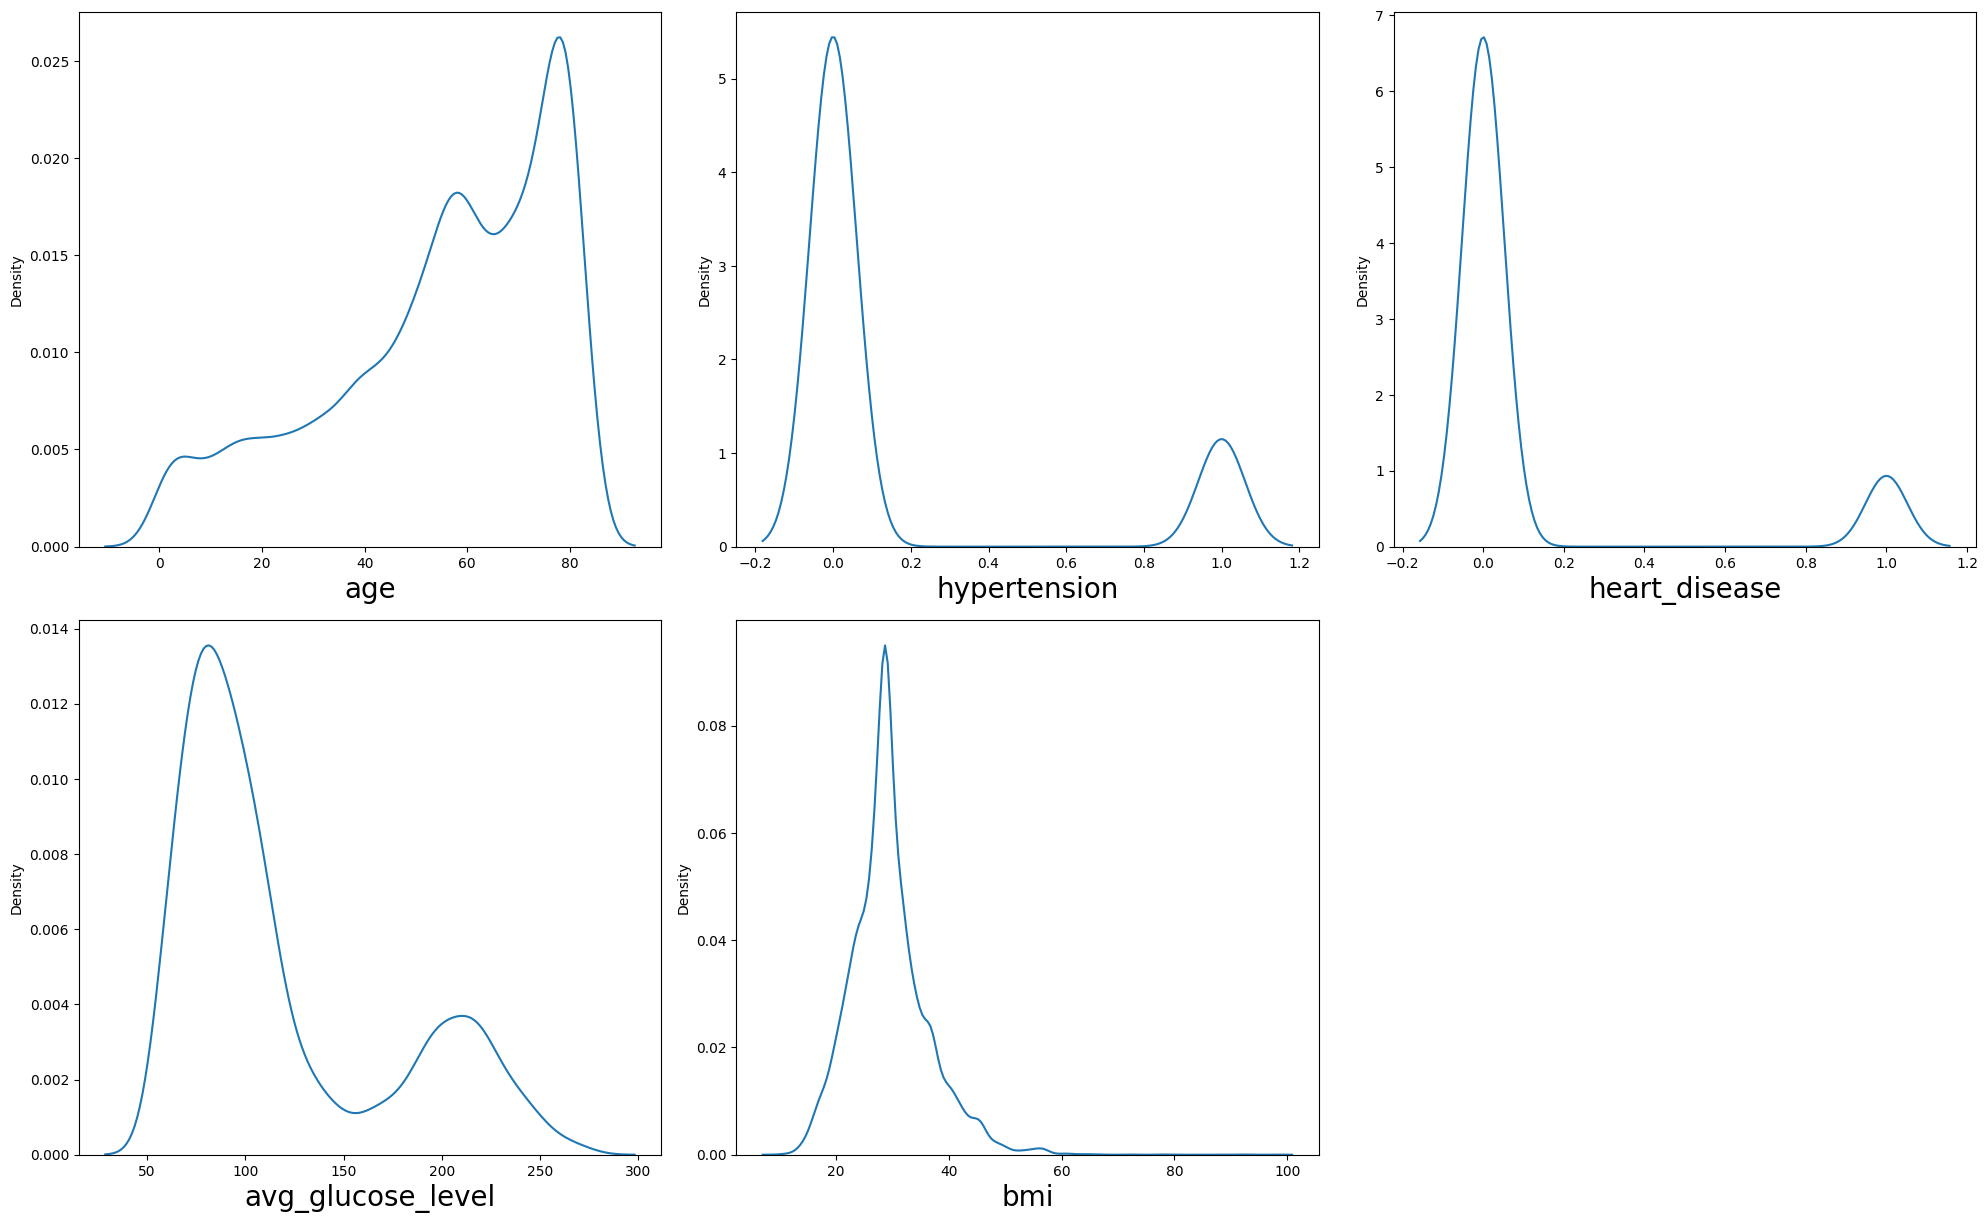

In [84]:
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.kdeplot(cols[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [85]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [86]:
df.gender.value_counts()

,count
gender,
Female,5621
Male,4100
Other,1


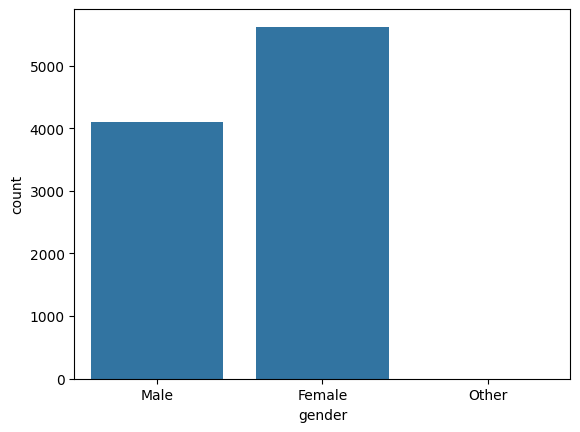

In [87]:
sns.countplot(x='gender', data=df)
plt.show()

In [88]:
df.ever_married.value_counts()

,count
ever_married,
Yes,7414
No,2308


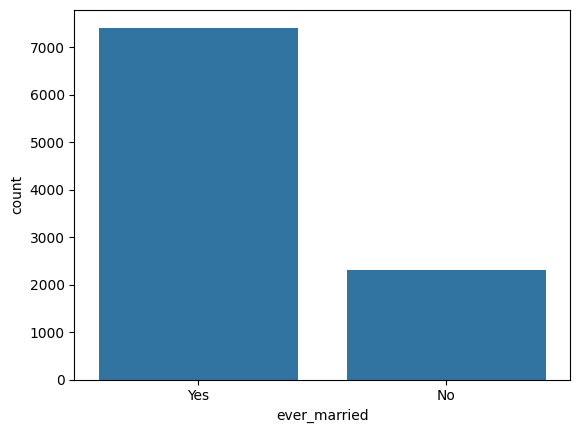

In [89]:
sns.countplot(x='ever_married', data=df)
plt.show()

In [90]:
df.work_type.value_counts()


,count
work_type,
Private,5650
Self-employed,2031
Govt_job,1297
children,722
Never_worked,22


<Axes: xlabel='work_type', ylabel='count'>

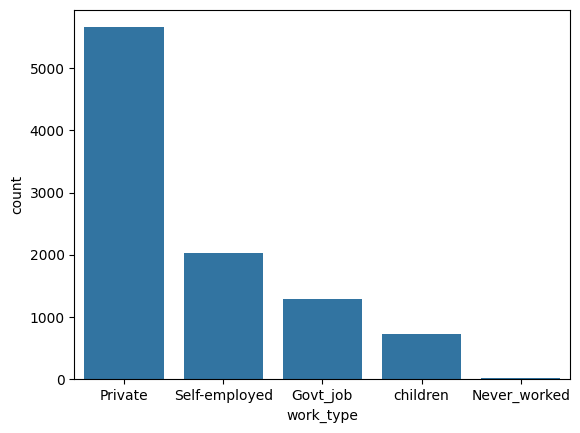

In [91]:
sns.countplot(x='work_type', data=df)

In [92]:
df.Residence_type.value_counts()

,count
Residence_type,
Urban,5137
Rural,4585


<Axes: xlabel='Residence_type', ylabel='count'>

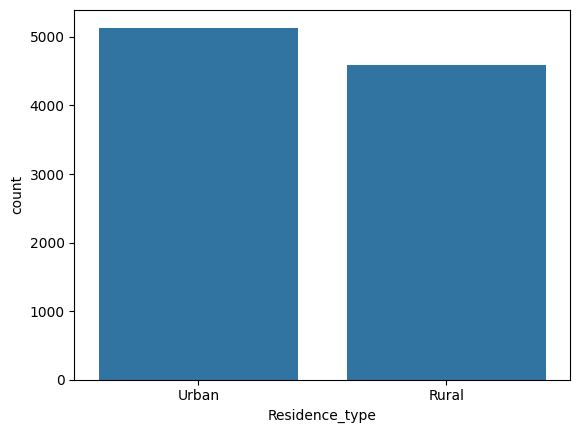

In [93]:
sns.countplot(x='Residence_type', data=df)

In [94]:
df.smoking_status.value_counts()

,count
smoking_status,
never smoked,3576
Unknown,2439
formerly smoked,2140
smokes,1567


<Axes: xlabel='smoking_status', ylabel='count'>

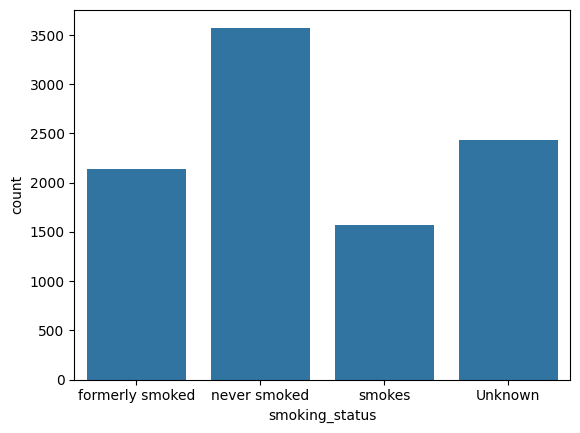

In [95]:
sns.countplot(x='smoking_status', data=df)

## Relation between categorical column and target columns

In [96]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

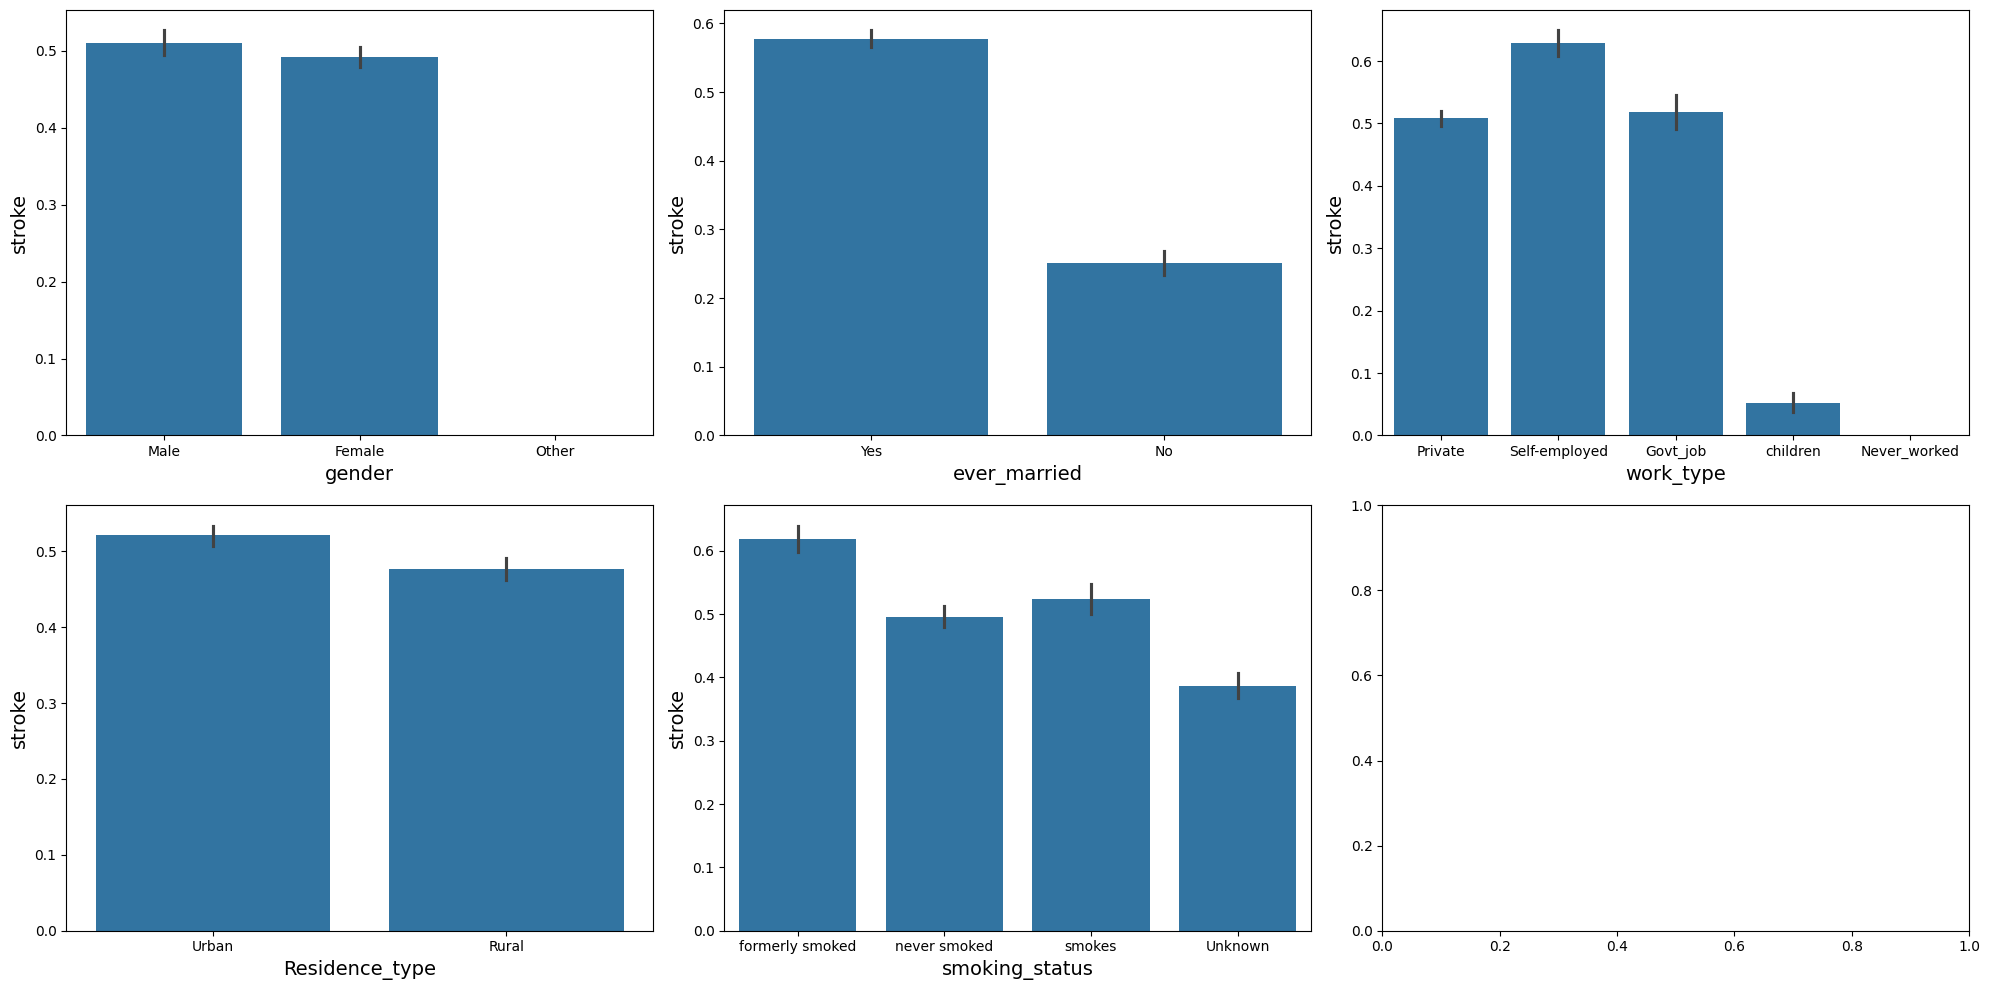

In [97]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    # Pass x and y as keyword arguments
    sns.barplot(x=c, y=target, data=df, ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)

plt.tight_layout()
plt.show()

Pandas profliling(ydata-profiling)

In [98]:
!pip install ydata-profiling

In [99]:
from ydata_profiling import ProfileReport

In [100]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [101]:
profile = ProfileReport(df)
profile.to_file(output_file = "stroke.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Handling categorical values

In [102]:

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9722 non-null   int64  
 1   gender             9722 non-null   object 
 2   age                9722 non-null   float64
 3   hypertension       9722 non-null   int64  
 4   heart_disease      9722 non-null   int64  
 5   ever_married       9722 non-null   object 
 6   work_type          9722 non-null   object 
 7   Residence_type     9722 non-null   object 
 8   avg_glucose_level  9722 non-null   float64
 9   bmi                9722 non-null   float64
 10  smoking_status     9722 non-null   object 
 11  stroke             9722 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 911.6+ KB


In [104]:
df.gender.value_counts()

,count
gender,
Female,5621
Male,4100
Other,1


In [105]:
gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

,gender_Male,gender_Other
0,True,False
1,False,False
2,True,False
3,False,False
4,False,False


In [106]:
df.ever_married.value_counts()

,count
ever_married,
Yes,7414
No,2308


In [107]:
married = pd.get_dummies(df[['ever_married']], drop_first= True)
married.head()

,ever_married_Yes
0,True
1,True
2,True
3,True
4,True


In [108]:
df.work_type.value_counts()

,count
work_type,
Private,5650
Self-employed,2031
Govt_job,1297
children,722
Never_worked,22


In [109]:
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,False,True,False,False
4,False,False,True,False


In [110]:
df['Residence_type'].value_counts()

,count
Residence_type,
Urban,5137
Rural,4585


In [111]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,True
1,False
2,False
3,True
4,False


In [112]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [113]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,3576
Unknown,2439
formerly smoked,2140
smokes,1567


In [114]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,True,False,False
1,False,True,False
2,False,True,False
3,False,False,True
4,False,True,False


In [115]:
data = pd.concat([df, gender, married, work, residence, smoking], axis = 1)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,False,True,False,True,False,False,True,True,False,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,False,True,False,False,True,False,False,False,True,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,False,True,False,True,False,False,False,False,True,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,False,True,False,True,False,False,True,False,False,True
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,False,True,False,False,True,False,False,False,True,False


In [116]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


In [117]:
data = data.drop(columns="id" , axis=1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


In [118]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [119]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


In [120]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000
mean,54.919264,0.174141,0.121991,118.389534,29.446431,0.500000
std,22.232607,0.379250,0.327293,55.200755,6.830920,0.500026
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,41.000000,0.000000,0.000000,78.057500,25.300000,0.000000
50%,59.000000,0.000000,0.000000,96.775000,28.893237,0.500000
75%,74.000000,0.000000,0.000000,144.900000,32.500000,1.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Correalation between features and target

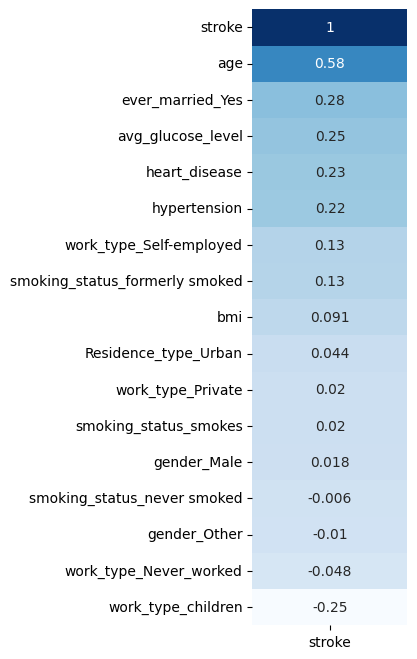

In [121]:
corr = data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

## Saving preprocessed dataset

In [123]:
data.to_csv("updated_dataset.csv")